<a href="https://colab.research.google.com/github/MeenatchiKV/My-ML-Learnings/blob/master/Data_Augmentation_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


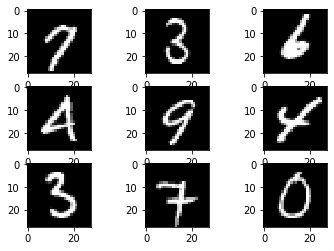

In [ ]:
# Save augmented images to file
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
import os
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator()
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
os.makedirs('images')
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, save_to_dir='images', save_prefix='aug', save_format='png'):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

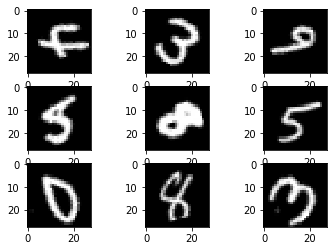

In [ ]:
datagen = ImageDataGenerator(rotation_range=90)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
#os.makedirs('images')
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, save_to_dir='images', save_prefix='aug', save_format='png'):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

In [ ]:
EPOCHS = 100
BS = 32

aug = ImageDataGenerator(rotation_range=20, zoom_range=0.15,
	width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
	horizontal_flip=True, fill_mode="nearest")

# Create the model

import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from keras import regularizers
model=Sequential()
model.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(28,28,1),strides=(1,1),dilation_rate=(1,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(10,activation='softmax'))
  



In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

In [ ]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y = y_test
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model1 = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20)
# train the network




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/20





60000/60000 [==============================] - 25s 420us/step - loss: 1.3617 - acc: 0.8895 - val_loss: 0.1037 - val_acc: 0.9821
Epoch 2/20
60000/60000 [==============================] - 10s 162us/step - loss: 0.1075 - acc: 0.9777 - val_loss: 0.0961 - val_acc: 0.9802
Epoch 3/20
60000/60000 [==============================] - 10s 163us/step - loss: 0.0913 - acc: 0.9812 - val_loss: 0.0743 - val_acc: 0.9853
Epoch 4/20
60000/60000 [==============================] - 10s 161us/step - loss: 0.0869 - acc: 0.9816 - val_loss: 0.0695 - val_acc: 0.9853
Epoch 5/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.0784 - acc: 0.9836 - val_loss: 0.0665 - val_acc: 0.9864
Epoch 6/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.0811 - acc: 0.9828 - val_loss: 0.0802 - val_acc: 0.9811
Epoch 7/20
600

In [ ]:
from keras.models import load_model
model.save("myfirst")
model1 = load_model("myfirst")
H = model1.fit_generator(aug.flow(X_train, y_train, batch_size=BS),
	validation_data=(X_test, y_test), steps_per_epoch=len(X_train) // BS,
	epochs=20)


Epoch 1/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2801 - acc: 0.9345 - val_loss: 0.2104 - val_acc: 0.9624
Epoch 2/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2747 - acc: 0.9357 - val_loss: 0.2821 - val_acc: 0.9595
Epoch 3/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2827 - acc: 0.9353 - val_loss: 0.2358 - val_acc: 0.9697
Epoch 4/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2798 - acc: 0.9343 - val_loss: 0.2788 - val_acc: 0.9548
Epoch 5/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2797 - acc: 0.9355 - val_loss: 0.2576 - val_acc: 0.9624
Epoch 6/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2793 - acc: 0.9358 - val_loss: 0.3148 - val_acc: 0.9604
Epoch 7/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2766 - acc: 0.9362 - val_loss: 0.3764 - val_acc: 0.9503
Epoch 8/20
1875/1875 [==========================

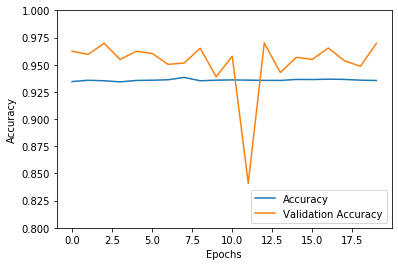

In [ ]:
import matplotlib.pyplot as plt

plt.plot(H.history['acc'],label="Accuracy")
plt.plot(H.history['val_acc'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.8,1])
plt.legend(loc=4)
test_loss,test_acc = model1.evaluate(X_test,y_test,verbose=2)